<img src="https://heig-vd.ch/docs/default-source/doc-global-newsletter/2020-slim.svg" alt="Logo HEIG-VD" style="width: 80px;" align="right"/>

# Cours APN - Labo 5 : Cartes auto-organisatrices (SOM) de Kohonen

## Résumé

Le but de ce laboratoire est de réaliser une expérience de groupement avec des cartes auto-organisatrices.  Le code vous est fourni, y compris les deux librairies `kohonen.py` et `KohonenUtils.py`.  On vous demande de trouver une bonne paramétrisation de la carte, et d'expliquer brièvement quelques éléments de code.

In [187]:
import KohonenUtils
import numpy as np
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Données

On considère une liste de 16 animaux, décrits à l'aide de 13 attributs booléens.  Les données sont fournies dans cette section.  Veuillez exécuter les cellules, inspecter les données, et répondre à la question finale.

In [188]:
matrix = np.array([[1,0,0,1,0,0,0,0,1,0,0,1,0],
                   [1,0,0,1,0,0,0,0,1,0,0,0,0],
                   [1,0,0,1,0,0,0,0,1,0,0,0,1],
                   [1,0,0,1,0,0,0,1,1,0,0,1,1],
                   [1,0,0,1,0,0,0,0,1,1,0,1,0],
                   [1,0,0,1,0,0,0,0,1,1,0,1,0],
                   [0,1,0,1,0,0,0,0,1,1,0,1,0],
                   [0,1,0,0,1,1,0,0,0,1,0,0,0],
                   [0,1,0,0,1,1,0,0,0,0,1,0,0],
                   [0,1,0,0,1,1,0,1,0,1,1,0,0],
                   [1,0,0,0,1,1,0,0,0,1,0,0,0],
                   [0,0,1,0,1,1,0,0,0,1,1,0,0],
                   [0,0,1,0,1,1,0,1,0,1,1,0,0],
                   [0,0,1,0,1,1,1,1,0,0,1,0,0],
                   [0,0,1,0,1,1,1,1,0,0,1,0,0],
                   [0,0,1,0,1,1,1,0,0,0,0,0,0]])

In [189]:
animals = pd.DataFrame(matrix.astype(float),columns=['small', 'medium', 'big', '2legs', '4legs', 'hair', 'hooves',
                                'mane', 'feathers', 'hunt', 'run', 'fly', 'swim'])

animals.index = ['dove', 'hen', 'duck', 'goose', 'owl', 'hawk', 'eagle', 'fox',
                 'dog', 'wolf', 'cat', 'tiger', 'lion', 'horse', 'zebra', 'cow']

display(animals)

,small,medium,big,2legs,4legs,hair,hooves,mane,feathers,hunt,run,fly,swim
dove,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
hen,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
duck,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
goose,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
owl,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
hawk,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
eagle,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
fox,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
dog,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
wolf,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


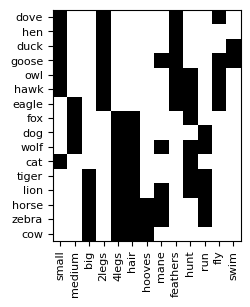

In [190]:
plt.figure(figsize=(3,3))
plt.xticks(np.arange(matrix.shape[1]), animals.columns, rotation=90, fontsize=8)
plt.yticks(np.arange(matrix.shape[0]), animals.index, fontsize=8)
plt.imshow(matrix, cmap='binary') # carré noir = 1

**Question 1a :** pouvez-vous identifier visuellement des groupes d'animaux ?

*Réponse :* Oui, on peut voir qu'il y a des animaux qui partagent les mêmes attributs. Par exemple, dove, hen, duck et goose font clairement partie du groupe des **petits** animaux à **plumes** sur **deux pattes** (small, feathers, 2legs).

## 2. Entraînement d'une carte de Kohonen

Le code fourni ci-dessous crée une carte auto-organisatrice, l'entraîne, et affiche le résultat final sous la forme d'une matrice-U.  Veuillez répondre aux questions qui suivent.

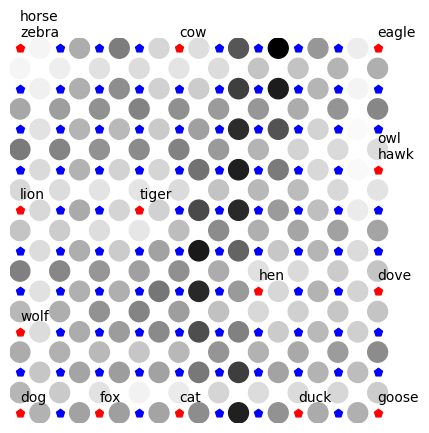

In [191]:
import math

# Taille idéale pour qu'il y ait 5 * sqrt(n) points répartis sur une carte carrée (tiré du cours sur les SOM)
#ideal_size = int(math.sqrt(5. * math.sqrt(len(animals.columns))))

# Taille idéale pour essayer de reproduire la carte présentée sur la slide N°23 du cours sur les SOM
ideal_size = 10

kmap = KohonenUtils.KohonenMap(ideal_size, ideal_size, size_vector=len(animals.columns)) # initialiser la SOM

n_iter = 100

learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.1, n_iter * len(animals.columns))

neighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(animals.index), 1, n_iter * len(animals.index))

kmap.train(animals.values, np.array(animals.index), n_iter, learning_rate, neighborhood_size) # entraîner la SOM

kmap.plot_umatrix(plot_names=True, plot_empty=True, fontsize=10) # afficher le résultat

**Question 2a :** veuillez expliquer brièvement, avec vos propres mots, ce que représente la matrice U, en répondant aux questions suivantes :
- que représentent les trois paramètres du constructeur `KohonenMap` ?
- que représentent les points bleus ?
- que représentent les points rouges ?
- que représentent les points gris et les niveaux de gris ?
- pour une carte de taille _m_ * _n_, combien y a-t-il de points gris ?

*Réponse :*
- Les 3 paramètres sont :
  - La taille horizontale de la carte
  - La taille verticale de la carte
  - Le nombre de données (ici, le nombre d'animaux différents à placer sur la carte)
- Les points bleus représentent les unités de la carte (neurones)
- Les points rouges représentes les unités ayant été gagnante pour au moins une classe
- Les zones grises représentent la distance aux voisins. Un taux de gris foncé entre deux points indique une grande distance. On peut interpréter les zones foncées comme étant les séparations entre les groupes de points.
- Pour une carte de taille m*n, il y aura : (2M-1)(2N-1) - NM - (M-1)(N-1) zones grises
  - En développant, obtient : 2MN - M - N


**Question 2b :** veuillez régler les paramètres du constructeur `KohonenMap` et le `n_iter` de façon à aboutir à une carte de Kohonen qui regroupe les seize animaux d'une manière qui vous semble cohérente.   Veuillez indiquer ci-dessous les paramètres choisis, lister les groupes observés d'animaux, et commenter le résultat.

*Réponse :* 

**Ajustement des paramètres**

1. Il faut commencer par choisir une bonne taille de carte. J'ai d'abord essayé avec la formule du cours (5 * sqrt(n) unités) mais ça donnait une carte un peu trop petite, j'ai donc pris une taille de 10x10 comme sur la slide N°23 du cours sur les SOM.
2. J'ai augmenté le nombre d'itérations de 10 à 100. Empiriquement, j'ai remarqué que ça donnait de meilleurs résultats et accentuait les séparations entre les groupes d'animaux.
3. J'ai modifié un peu la fonction décroissante du learning rate pour que la valeur finale soit de 0.1 et que ça corresponde au nombre d'itérations de la carte.

**Groupes observés**

/!\ : *Les cartes de Kohonen sont non-déterministe donc je vais décrire ce que j'ai observé avec une des cartes obtenues mais il est possible que ça ne corresponde pas exactement à la vôtre si vous relancez le notebook.*

Il y a généralement une bonne séparation entre les oiseaux et les mammifères. Et on observe les groupes suivants :
- oiseaux non-chasseurs : goose, duck, hen, dove
- oiseaux chasseurs : owl, hawk et eagle (du même côté que les autres oiseaux mais clairement séparés)
- "petits" animaux chasseurs : cat, fox, dog, wolf
- félins de grande taille : tiger, lion
- herbivores : horse, zebra, cow



**Question 2c :** veuillez afficher une image de la matrice-U, au format PNG ou JPG, sur laquelle vous aurez dessiné les frontières visibles (à la main, avec un logiciel d'édition de votre choix).  Veillez à sauvegarder le notebook avec l'image avant l'envoi sur Cyberlearn.

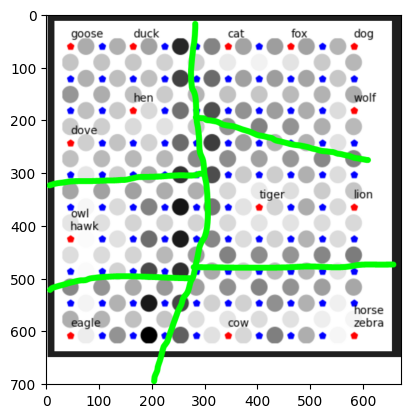

In [192]:
# Pour afficher votre image ici :
plt.imshow(mpimg.imread('matrice-u.png'))

## 3. Analyse des paramètres de l'entraînement

Dans cette section, le but est de comprendre les paramètres `learning_rate` et `neighborhood_size`.  Veuillez ré-exécuter les commandes ci-dessous qui les ré-initialisent.  On vous encourage à faire différents essais avant de répondre.

In [193]:
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.2, n_iter * len(animals.index))

**Question 3a :** veuillez expliquer avec vos propres mots le fonctionnement de `learning_rate` en répondant aux questions suivantes :
- quel est le type de `learning_rate` ?
  - *Réponse :* C'est une "série" (donc un tableau de valeurs)
- quelles sont les significations de ses trois paramètres ?
  - *Réponse :* (1) Valeur de départ (2) Valeur finale (3) Nombre d'itérations pour arriver à la valeur finale
- pourquoi la valeur du troisième paramètre est-elle choisie ainsi ?
  - *Réponse :* On va parcourir `len(animaux)` fois les données, multiplié par le nombre d'itérations.
- comme fonctionne la `learning_rate` ?
  - *Réponse :* Pas sûr d'avoir vraiment compris la question. Le but d'un learning rate exponentiel est qu'il diminue exponentiellement au fil de l'entraînement. La logique est que plus on avance dans l'entraînement du modèle, plus les modifications devront être "subtiles", d'où la diminution du learning rate au fur et à mesure.

**Question 3b :** veuillez afficher d'une façon convenable la ou les valeur(s) de la `learning_rate`.

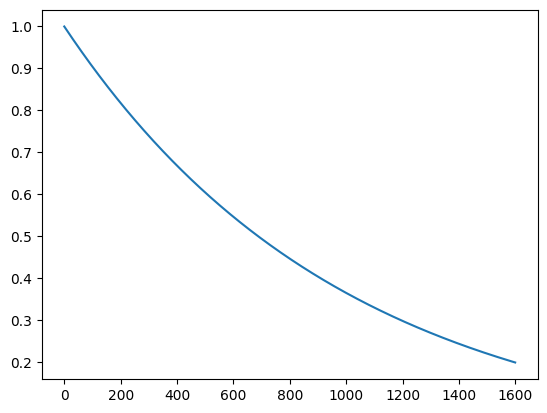

In [ ]:
# Votre code pour l'affichage de learning_rate ici :
learning_rate.plot()

On pose maintenant les mêmes questions pour `neighborhood_size`.  <br/> Si les réponses sont similaires, vous pouvez copier/coller les réponses précédentes.

In [196]:
neighborhood_size = KohonenUtils.ExponentialTimeseries(4./3 * len(animals.index), 1, n_iter * len(animals.index))

**Question 3c :** veuillez expliquer avec vos propres mots le fonctionnement de `neighborhood_size` en répondant aux questions suivantes :
- quel est le type de `neighborhood_size` ?
  - *Réponse :* C'est exactement le même type de données qu'avant, donc même réponse et pareil pour la signification des 3 paramètres.
- quelles sont les significations de ses trois paramètres ?
- comme fonctionne la `neighborhood_size` ?
  - *Réponse :* Pas sûr non plus d'avoir compris la question. Le neighborhood size correspond à la taille du voisinage qui sera influencé par l'entraînement du modèle après qu'on aie trouvé un "neurone gagnant". Pour la même raison que le learning_rate, on veut faire des mises à jour de plus en plus subtiles et précises, d'où la diminution exponentielle de neighborhood_size au fil du temps.

**Question 3d :** veuillez afficher d'une façon convenable la ou les valeur(s) de la `neighborhood_size`.

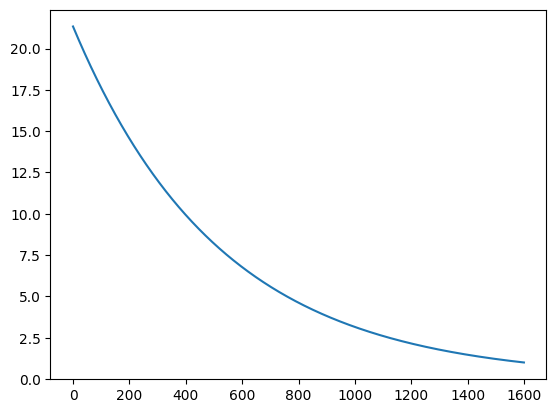

In [201]:
# Votre code pour l'affichage de neighborhood_size ici :
neighborhood_size.plot()

**Fin du Labo 5.**  Veuillez nettoyer ce notebook, afficher les résultats et les commentaires demandés, l'enregistrer, et le soumettre comme devoir sur Cyberlearn.